In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = 'dataset/petimages2/'

In [3]:
batch_size = 20
img_height = 150
img_width = 150

In [14]:
model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(150, 150, 3)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  tf.keras.layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
gpus = tf.config.experimental.list_logical_devices()
print(gpus)

[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [17]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest'
)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)



training_generator = train_datagen.flow_from_directory(
    data_dir + 'train', 
    batch_size=20, 
    class_mode='binary', 
    target_size=(150, 150)
)

validation_generator = validation_datagen.flow_from_directory(
    data_dir + 'val', 
    batch_size=20, 
    class_mode='binary', 
    target_size=(150, 150)
)

Found 20000 images belonging to 2 classes.
Found 4997 images belonging to 2 classes.


In [18]:
model.load_weights('Weights_folder/Weights').expect_partial()

In [19]:
history = model.fit(
    training_generator, 
    validation_data=validation_generator, 
    epochs=1
)

   5/1000 [..............................] - ETA: 11:13 - loss: 0.2671 - accuracy: 0.8900

In [56]:
# model.save_weights('Weights_folder_v3/Weights')

In [50]:
def plot_metrics(metric_name):
    train_loss = history.history[metric_name]
    epochs = range(len(train_loss))
    val_loss = history.history['val_' + metric_name]
    plt.figure(figsize=(5, 5))
    plt.plot(epochs, train_loss, color='r')
    plt.plot(epochs, val_loss, color='b')
    plt.title(f'Model {metric_name}')
    plt.legend([f'training_{metric_name}', f'val_{metric_name}'])
    plt.xlabel('epochs')
    plt.ylabel(f'{metric_name}')
    plt.show()

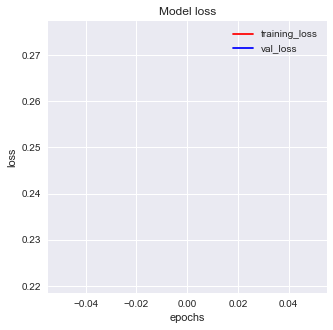

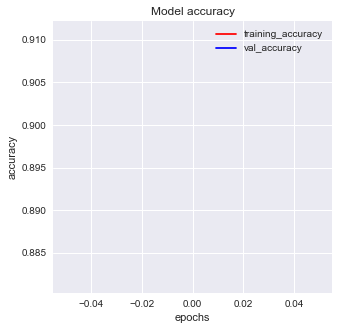

In [51]:
plt.style.use('seaborn')
plot_metrics('loss')
plot_metrics('accuracy')

In [52]:
import cv2 as cv
def predict_class(filename, model, i):
    img = keras.preprocessing.image.load_img(filename, target_size=(img_height, img_width))
    x = keras.preprocessing.image.img_to_array(img) / 255.
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    result = model.predict(images, batch_size=10, verbose="silent")
    if result[0]>0.5:
        print(f"Image {i}: Dog")
    else:
        print(f"Image {i}: Cat")

In [55]:
for i in range(1, 7):
    predict_class(f'images_from_net/{i}.jpg', model, i)

Image 1: Dog
Image 2: Dog
Image 3: Dog
Image 4: Dog
Image 5: Cat
Image 6: Cat
